# 线性回归

线性回归的预测模型为：$\hat{y} = \theta_0 +\theta_1x_1+\theta_2x_2 + ...+ \theta_nx_n$  
成本函数 $（X,h_θ）= \frac{1}{m} \sum\limits_{i=1}^m (θ^T \cdot X^{(i)} - y^{(i)})^2 $  
* $\hat{y}$ 表示预测值
* n 是特征的数量
* $x_i$ 是第i个特征值
* $\theta_j$是第j个模型参数
* $X^{(i)}$表示第i个实例，这里是列向量
* X的每个实例的$x_0$都为1

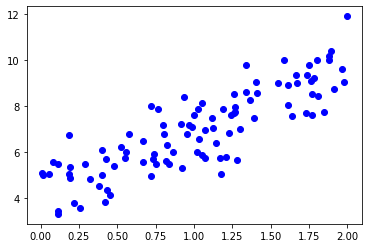

In [42]:
#例子：
import numpy as np
import matplotlib.pyplot  as plt
m = 100
n = 1 #特征值数量
X = 2 * np.random.rand(m,n) # X 是列向量
Y = 4 +3*X +np.random.randn(m,1) #Y 也是列向量
plt.plot(X,Y,'ob')

### 标准方程解法

标准方程：$\theta = (X^T \cdot X)^{-1}\cdot X^T \cdot Y $  
其中X是n x (m+1)特征值矩阵，Y是 nx1矩阵

In [43]:
X_b = np.c_[np.ones((m,1)),X] #使每个实例的x0 = 1
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y) #标准公式
theta

array([[4.1910668 ],
       [2.71355021]])

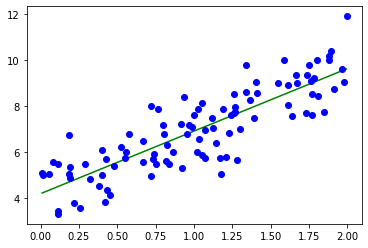

In [44]:
X_new = np.array([[np.min(X)],[np.max(X)]])  #2x1矩阵
X_new_b = np.c_[np.ones((len(X_new),1)),X_new] 
Y_predict = X_new_b.dot(theta)  #这里的theta 是2x1的矩阵  X_new_b 是2x2矩阵  得到的结果 Y_predict是 2x1 矩阵

plt.plot(X_new,Y_predict,'-g')
plt.plot(X,Y,'ob')
plt.show()

### 梯度下降

梯度下降是一种非常通用化的优化算法，能够为大范围的问题找到最优解。梯度下降的中心思想就是迭代地调整参数从而使成本函数最小化。  
具体来说，首先使用一个随机的θ值（随机初始化），然后逐步改进，每次踏出一小步，每一步都尝试降低一点成本函数，直达算法收敛出一个最小值。

梯度下降中的一个重要参数是每一步的步长，也就是学习率。  
如果学习率太低，算法需要经过大量的迭代才能收敛，会耗费大量的时间。  
如果学习率太高，可能会越过最低点直接达到山的另一边，甚至可能比起点还要高。会导致算法发散，最后无法找到好的解决方案。

梯度下降可能会遇到局部最小陷阱，找到的是局部最小值，而不是全局最小值。  
在线性回归中成本函数是一个凸函数，不存在局部最小值，只有全局最小值，这保证了梯度下降可以趋近于全局最小值。

#### 批量梯度下降

成本函数的偏导数：$ \frac{\partial MSE(\theta)}{\partial \theta_j} = \frac{2}{m}\sum\limits_{i=1}^m (\theta^T \cdot X^{(i)} - y^{(i)})x_j^{(i)}$  
成本函数的梯度向量：$ \nabla_\theta MSE(\theta) = \begin{pmatrix} 
\frac{\partial MSE(\theta)}{\partial \theta_0}\\
\frac{\partial MSE(\theta)}{\partial \theta_1}\\
\vdots \\
\frac{\partial MSE(\theta)}{\partial \theta_n}\\
\end{pmatrix} = \frac{2}{m}X^T \cdot (X \cdot \theta -Y)$

**特别注意的是梯度下降的每一步都是基于完整的训练集X，因此，当训练集非常庞大时，算法会变得极慢**  
但是，梯度下降算法随特征值数量扩展的表现比较好，如果要训练的线性模型拥有几十万个特征，使用梯度下降比标准方程要快得多

梯度下降步长：$$ \theta^{(next)} = \theta - \alpha \cdot \nabla_\theta MES(\theta) $$  
* 其中 $\alpha$ 表示学习率

In [45]:
def batch_gradient_descent(learning_rate,theta):
    iterations = 0 #计算迭代次数
    while True:
        iterations +=1
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y)
        theta = theta - learning_rate * gradients
        if np.linalg.norm(gradients,ord=2)< 0.00001 or iterations > 1000:
            return theta,iterations

learning_rate = 0.1  #学习率
theta = np.random.randn(n+1,1) #theta 随机初始化
theta_best,iterations = batch_gradient_descent(learning_rate,theta)
theta_best,iterations

(array([[4.19104116],
        [2.7135718 ]]),
 344)

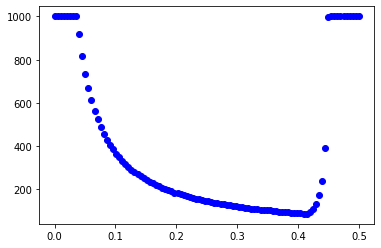

(array([[4.19104361],
        [2.71356975]]),
 83)

In [46]:
#测试随着学习率的变化，迭代次数的变化
np.seterr(invalid='ignore') #忽略某些迭代是的计算错误

learning_rates = etas = np.linspace(0,0.5,100);
theta_init = np.zeros((n+1,1))

iterations_list = []
for i in range(len(learning_rates)):
    theta_new,iterations = batch_gradient_descent(learning_rates[i],theta_init)
    iterations_list.append(iterations)
plt.plot(learning_rates,iterations_list,'ob')
plt.show()

batch_gradient_descent(0.4,theta) #和上面学习率为0.1时的迭代次数由显著的区别

#### 随机梯度下降

随机梯度下降每一步在训练集中随机选择一个实例，并且仅仅、基于该单个实例来计算梯度。  
由于算法的随机性质，它比批量梯度下降要不规则的多。成本函数将不再是缓缓降低直到抵达最小值，而是不断上上下下，但是，从总体来看，还是在慢慢
下降。随着时间的推移，最终会非常接近最小值。但是即使它达到了最小值，依旧还会持续反弹，永远不会停止。所以，该算法停下来的参数值肯定是足够好的，但不是最优的。  
当成本函数非常不规则时，随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。
因此，好处：可以跳出局部最优。缺点：永远找不到最小值。

要解决这个困境，有一个办法是逐步降低学习率。开始的步长比较大，然后越来越小，让算法尽量靠近全局最小值。这个过程叫做模拟退火，确定每个迭代学习率的函数叫学习计划。如果学习率降得太快，可能会陷入局部最小值，甚至停留在走向最小值的半途中。如果学习率降得太慢，需要太长时间才能跳到差不多最小值附件，如果提早结束，可能只得到一个次优的解决方案。

In [47]:
def learning_schedule(t): #学习计划函数，随着t的增大，学习率逐渐减小 
    return 5/(t+50)

def stochastic_gradient_descent(theta,n_epochs):
    epoch = 0
    while epoch < n_epochs: #控制最大迭代次数
        epoch +=1
        temp_theta = theta
        for i in range(m):
            random_index = np.random.randint(m) #生成随机索引
            xi = X_b[random_index:random_index+1] #如果直接使用的是 X_b[random_index],则表示的是一个一维度数组，无法进行转置
            yi = Y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(temp_theta)-yi)
            eta = learning_schedule(epoch*m+i) #学习率随着 epoch或者i的增大而逐渐减小
            temp_theta = temp_theta - eta * gradients
        if  np.linalg.norm(temp_theta-theta,ord=2) <0.00001:
            return theta,epoch
        theta = temp_theta
    return theta,epoch

theta = np.random.randn(n+1,1)
n_epochs = 50 #设置最大迭代的次数
theta,epoch = stochastic_gradient_descent(theta,n_epochs)
theta,epoch

(array([[4.21415628],
        [2.68195631]]),
 50)

#### 小批量梯度下降

每一步的梯度计算，既不是基于整个训练集（批量梯度下降），也不是基于单个实例（随机梯度下降），而是基于一小部分随机的实例集也就是小批量。相比随机梯度下降，小批量梯度下降的主要优势在于可以从矩阵运算的硬件优化中获得显著的性能提升，特别是需要用到图形处理器时。

这个算法在参数空间层面的前进过程不像SGD那样不稳定，特别是批量较大时，所以小批量梯度下降最终会比SGD更接近最小值一些。但是另一方面，它可能更难从局部最小值中逃脱（不是指现在的线性回归，而是对于深受局部最小值陷阱困扰的问题）。

In [48]:
def miniBatch_gradient_descent(theta,n_epochs):
    epoch = 0;
    batch = m//5
    while epoch < n_epochs:
        epoch +=1
        i = 0
        temp_theta = theta
        while i < m:
            xi = X_b[i:i+batch if i+batch<= m else m]
            yi = Y[i:i+batch if i+batch<= m else m]
            gradients = xi.T.dot(xi.dot(temp_theta)-yi)
            eta = learning_schedule(epoch*m+i) #学习率随着 epoch或者i的增大而逐渐减小，和随机梯度下降使用的同一个学习计划
            temp_theta = temp_theta - eta*gradients
            i +=batch
        if  np.linalg.norm(temp_theta-theta,ord=2) <0.00001:
            return theta,epoch
        theta = temp_theta
    return theta,epoch
        
theta = np.random.randn(n+1,1)
n_epochs = 50
miniBatch_gradient_descent(theta,n_epochs)

(array([[4.12112498],
        [2.7810443 ]]),
 50)

# 多项式回归

用线性模型来拟合非线性数据。一个简单的方法就是将每个特征的冥次方添加为一个新特征，然后在这个扩展过的特征集上训练线性模型

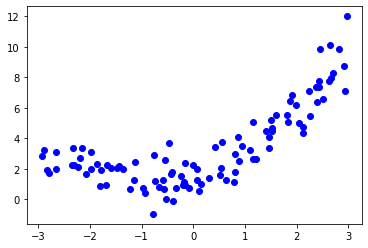

In [49]:
m = 100
n = 1
X = 6 * np.random.rand(m,1)-3
Y = 0.5*X**2 + X + 2 +np.random.randn(m,1)
plt.plot(X,Y,'ob')

In [50]:
#采用标准方程求解多项式拟合，同理也可以使用梯度下降的方式
def polynomial_fit(X,Y,degree):
    if degree < 1:
        raise Exception('degree 不能小于 1。x 的值为: {}'.format(degree))
    X_b = np.c_[np.ones((len(X),1)),X]
    for i in range (2,degree+1): #冥次方添加为新的特征值
        X_b = np.c_[X_b,X**i]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    return theta

degree = 2
theta = polynomial_fit(X,Y,degree)
theta

array([[1.61316445],
       [1.00602122],
       [0.55750571]])

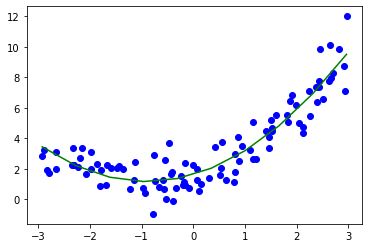

In [51]:
#画一条新的曲线
m_new = 10
X_new = np.linspace(np.min(X),np.max(X),m_new).reshape(m_new,1)
X_new_b = np.c_[np.ones((m_new,1)),X_new]
for i in range (2,degree+1):
        X_new_b = np.c_[X_new_b,X_new**i]

y_predict = X_new_b.dot(theta)
plt.plot(X,Y,'ob')
plt.plot(X_new,y_predict,'g')
plt.show()

## 偏差/方差权衡

在统计学和机器领域，一个重要的结论结果是，模型的泛化误差可以被表示为三个截然不同的误差之和：

**偏差**  
这部分泛化误差的原因在于错误的假设，比如假设数据时线性的，而实际上是二次的。高偏差模型最优可能对训练数据拟合不足。

**方差**  
这部分误差是由于模型对训练数据的微小变化而过度敏感导致的。具有高度自由度的模型（例如高阶多项式模型）很可能也有高方差，所以很容易对训练数据过度拟合。

**不可比避免的误差**  
这部分误差是因为数据本身的噪声所致。减少这部分误差的唯一方法就是清理数据（例如修复数据源，如损坏的传感器，或者是检测并移除异常值）。

增加模型的复杂度通常会显著提升模型的方差，减少偏差。反过来，降低模型的复杂度则会提升模型的偏差，降低方差。这就是为什么称其为权衡。

# 正则线性模型

**通过约束模型使其更简单，并降低过度拟合的风险，这个过程称为正则化。**  
对线性模型来说，正则化通常通过约束模型的权重来实现。主要有岭回归，套索回归及弹性网络这三种不同的实现方式对权重进行约束。

#### 岭回归

岭回归（也叫吉洪诺夫正则化）是线性回归的正则化版：在成本函数中添加一个等于 $\alpha \sum_{i=1}^{n} \theta_i^2$的正则项。这使得学习中的算法不仅需要拟合数据，同时还要让权重保持最小。（注意：正则项只能在训练的时候添加到成本函数中，一旦训练完成，需要使用未经正则化的性能指标来评估模型性能）

岭回归成本函数 $$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$$
注意，这里皮偏置项 $\theta_0 $没有正则化（求和从i=1开始，不是i=0）。
**在执行岭回归之前，必须对数据进行缩放，因为它对输入特征的大小非常敏感**  
岭回归的闭式解：$$ \hat{\theta} = (X^T \cdot X + \alpha A)^{-1} \cdot X \cdot Y $$
A 是一个 n x n的单位矩阵，除了左上单元格为0，其他与偏置项对应。

[[3.26064061]
 [0.03097017]
 [0.04300516]]
[[1.7981505 ]
 [0.75366732]
 [0.50762907]]
[[2.59782824]
 [0.23779439]
 [0.26024576]]
[[1.61316445]
 [1.00602122]
 [0.55750571]]


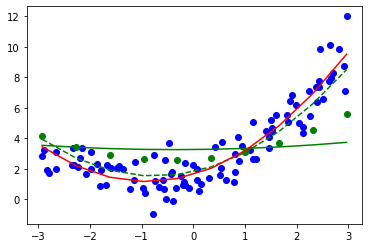

In [52]:
import numpy.matlib

def ridge_regression(X,Y,alpha,degree):
    if degree < 1:
        raise Exception('degree 不能小于 1。x 的值为: {}'.format(degree))
    X_b = np.c_[np.ones((len(X),1)),X]
    for i in range (2,degree+1): #冥次方添加为新的特征值
        X_b = np.c_[X_b,X**i]
    A = numpy.matlib.identity(len(X_b[0]))
    A[0,0] = 0 # 不惩罚 θ[0]
    theta = np.linalg.inv((X_b.T.dot(X_b) + alpha*A)).dot(X_b.T).dot(Y)
    return theta

theta1 = ridge_regression(X,Y,10000,degree)
#x_new_b = X_new_b[0:m_new,0:2]
x_new_b = X_new_b

y_predict1 = x_new_b.dot(theta1)
print(theta1)

theta2 = ridge_regression(X,Y,100,degree)
y_predict2 = x_new_b.dot(theta2)
print(theta2)

theta3 = ridge_regression(X,Y,1000,degree)
y_predict3 = x_new_b.dot(theta3)
print(theta3)

theta4 = ridge_regression(X,Y,0,degree)
y_predict4 = x_new_b.dot(theta4)
print(theta4)

plt.plot(X,Y,'ob')
plt.plot(X_new,y_predict1,'-g')
plt.plot(X_new,y_predict2,'--g')
plt.plot(X_new,y_predict3,'og')
plt.plot(X_new,y_predict4,'r')
plt.show()

#### 套索回归

线性回归的另一种正则化，叫做最小绝对收缩和选择算子回归（Least Absolute Shrinkage and Selection Operator Regression,简称Lasso回归，或套索回归）。与岭回归一样，它也是向成本函数增加一个正则项，但是它增加的是权重向量 $l_1$范数，而不是 $l_2$范数的一半。

Lasso回归成本函数$$ J(\theta) = MSE(\theta) +\alpha \sum_{i=1}^n |\theta_i| $$  
Lasso回归的一个重要特点是它倾向于完全消除掉最不重要特征的权重（也就是将他们置为零）。也就是说，Lasso回归会自动执行特征选择并输出一个稀疏模型（即只有很好的特征有非零权重）。

在Lasso成本函数下，BGD最后的路线在轴上不断反弹，这是因为当θ<sub>2</sub> = 0时，斜率突变，需要逐渐降低学习率来保证它向全局最小值收敛。

当$ \theta_i = 0$,Lasso是不可微的，但是，当任意$\theta_i =0$时，如果使用次梯度向量作为代替，依旧可以让梯度下降正常运转。  
Lasso回归次梯度向量 $$ g(\theta,J) = \nabla_\theta MSE(\theta) +\alpha \begin{pmatrix} sign(\theta_1)\\ sign(\theta_2)\\ \vdots\\ sign(\theta_n)\\  \end{pmatrix}  当sign(\theta_i) = \begin{cases}-1 (\theta_i <0)\\ \ \  0(\theta_i =0)\\+1 (\theta_i >0) \end{cases}$$

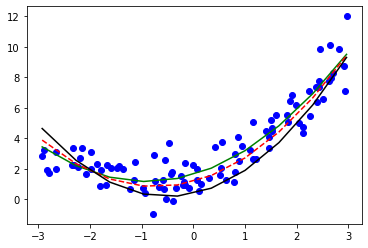

In [53]:
def sign(x):
    if x>0:return 1
    elif x==0:return 0
    elif x<0:return-1

def Lasso(X,Y,alpha,degree):
    if degree < 1:
        raise Exception('degree 不能小于 1。x 的值为: {}'.format(degree))
    X_b = np.c_[np.ones((len(X),1)),X]
    for i in range (2,degree+1): #冥次方添加为新的特征值
        X_b = np.c_[X_b,X**i]
    
    theta = np.random.randn(len(X_b[0]),1) 
    iterations = 0 #计算迭代次数
    while True:
        iterations +=1
        A = numpy.matlib.identity(len(X_b[0]))
        A[0,0] = 0 # 不惩罚 θ[0]
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y) + alpha*np.linalg.norm(np.sign(A.dot(theta)))
        theta = theta - 0.005 * gradients ##特别要注意学习率的选取
        if np.linalg.norm(gradients,ord=2)< 0.00001 or iterations > 1000:
            return theta,iterations

import math
theta_lasso1,itera = Lasso(X,Y,0,degree)
theta_lasso2,itera = Lasso(X,Y,math.exp(-1),degree)
theta_lasso3,itera = Lasso(X,Y,1,degree)

x_new_b = X_new_b
y_predict_lasso1 = x_new_b.dot(theta_lasso1)
y_predict_lasso2 = x_new_b.dot(theta_lasso2)
y_predict_lasso3 = x_new_b.dot(theta_lasso3)
plt.plot(X,Y,'ob')
plt.plot(X_new,y_predict_lasso1,'-g')
plt.plot(X_new,y_predict_lasso2,'--r')
plt.plot(X_new,y_predict_lasso3,'-k')
plt.show()

#### 弹性网络

弹性网络是基于岭回归与Lasso回归之间的中间地带，其正则项就是岭回归和Lasso回归的正则项的混合，混合比例通过r来控制。当r=0是，相当于岭回归，而当r=1时，相当于Lasso回归。

弹性网络成本函数$$ J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n + \frac{1-r}{2}\alpha \sum_{i=1}{n}\theta_i^2 $$

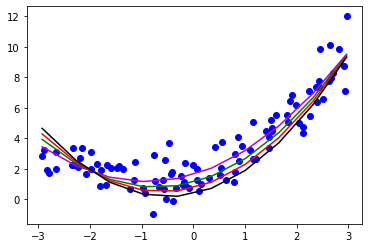

In [54]:
def Elastic_Net(X,Y,alpha,r,degree):
    if degree < 1:
        raise Exception('degree 不能小于 1。x 的值为: {}'.format(degree))
    X_b = np.c_[np.ones((len(X),1)),X]
    for i in range (2,degree+1): #冥次方添加为新的特征值
        X_b = np.c_[X_b,X**i]
        
    theta = np.random.randn(len(X_b[0]),1) 
    iterations = 0
    while True:
        iterations +=1
        A = numpy.matlib.identity(len(X_b[0]))
        A[0,0] = 0 # 不惩罚 θ[0]
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y)  + r*alpha*np.linalg.norm(np.sign(A.dot(theta))) \
                                                        + (1-r)/2*alpha*np.linalg.norm(A.dot(theta),ord=2)
        theta = theta - 0.005 * gradients ##特别要注意学习率的选取
        if np.linalg.norm(gradients,ord=2)< 0.00001 or iterations > 1000:
            return theta,iterations

theta_en1,itera = Elastic_Net(X,Y,1,0,degree) #相当于岭回归
theta_en2,itera = Elastic_Net(X,Y,1,0.5,degree) #r取值0.5
theta_en3,itera = Elastic_Net(X,Y,1,1,degree) #相当于Lasso回归
y_predict_en1 = x_new_b.dot(theta_en1)
y_predict_en2 = x_new_b.dot(theta_en2)
y_predict_en3 = x_new_b.dot(theta_en3)
plt.plot(X,Y,'ob')
plt.plot(X_new,y_predict,'-m') #这条线是没有使用正则化时的曲线
plt.plot(X_new,y_predict_en1,'-g')#岭回归曲线
plt.plot(X_new,y_predict_en2,'-r')# r=0.5的弹性网络曲线
plt.plot(X_new,y_predict_en3,'-k')#Lasso回归曲线
plt.show()

如何选择用线性回归，岭回归，Lasso回归和弹性网络呢？通常来说，有正则化，哪怕很小，总是比没有跟可取一些。所以大多数情况下，应该避免使用纯线性回归。岭回归是一个不错的默认选择，但是如果你觉得实际用到的特征只有少数几个，那就应该更倾向于Lasso回归或是弹性网络，因为他们会将无用特征的权重降为零。一般而言，弹性网络由于Lasso回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时，Lasso回归的表现可能非常不稳定。